In [2]:
# Preliminary Data Analysis for Police Stops Data

In [24]:
import pandas as pd
import matplotlib as plt
import pprint
pd.set_option('display.max_columns', None)

In [2]:
data_path = '/Users/abalwally/src/akshay_learning/police_stops_analysis/data/'
sc_data = 'sc_statewide_2020_04_01.csv'

In [20]:
df = pd.read_csv(data_path + sc_data, nrows=100000)

# Basic Views

In [26]:
pprint.pprint(list(df.columns))

['raw_row_number',
 'date',
 'location',
 'lat',
 'lng',
 'county_name',
 'subject_age',
 'subject_race',
 'subject_sex',
 'officer_id_hash',
 'officer_age',
 'officer_race',
 'department_id',
 'type',
 'violation',
 'arrest_made',
 'citation_issued',
 'outcome',
 'contraband_found',
 'contraband_drugs',
 'contraband_weapons',
 'contraband_alcohol',
 'contraband_other',
 'search_conducted',
 'search_person',
 'search_vehicle',
 'reason_for_stop',
 'raw_contact_type',
 'raw_sex',
 'raw_race',
 'raw_sectionnum',
 'raw_offensecode',
 'raw_contrabanddesc',
 'raw_officer_race',
 'year_as_int']


<AxesSubplot:>

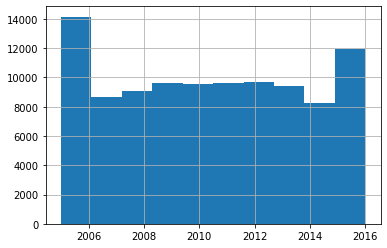

In [27]:
# dumb
df['year_as_int'] = df.date.apply(lambda x: int(x[:4]))
df['year_as_int'].hist()

<AxesSubplot:>

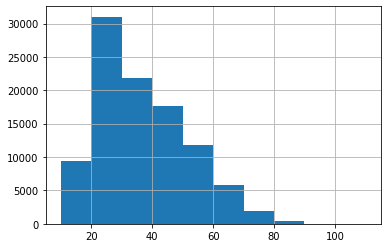

In [29]:
df.subject_age.hist()

<AxesSubplot:>

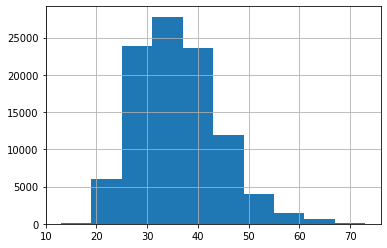

In [32]:
df.officer_age.hist()

<AxesSubplot:>

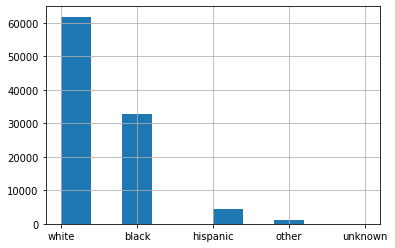

In [30]:
df.subject_race.hist()

<AxesSubplot:>

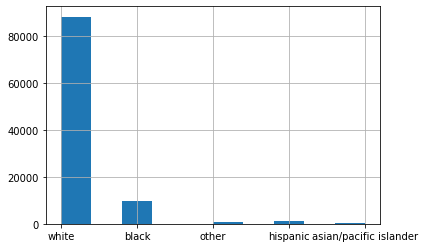

In [33]:
df.officer_race.hist()

<AxesSubplot:>

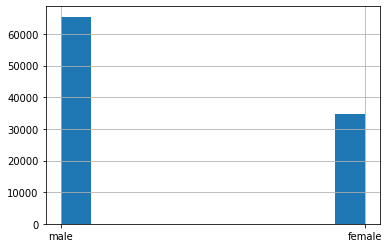

In [34]:
df.subject_sex.hist()

In [35]:
# No column for officer sex? that is weird.

AttributeError: 'DataFrame' object has no attribute 'officer_sex'

In [36]:
pprint.pprint(list(df.columns))

['raw_row_number',
 'date',
 'location',
 'lat',
 'lng',
 'county_name',
 'subject_age',
 'subject_race',
 'subject_sex',
 'officer_id_hash',
 'officer_age',
 'officer_race',
 'department_id',
 'type',
 'violation',
 'arrest_made',
 'citation_issued',
 'outcome',
 'contraband_found',
 'contraband_drugs',
 'contraband_weapons',
 'contraband_alcohol',
 'contraband_other',
 'search_conducted',
 'search_person',
 'search_vehicle',
 'reason_for_stop',
 'raw_contact_type',
 'raw_sex',
 'raw_race',
 'raw_sectionnum',
 'raw_offensecode',
 'raw_contrabanddesc',
 'raw_officer_race',
 'year_as_int']


<AxesSubplot:>

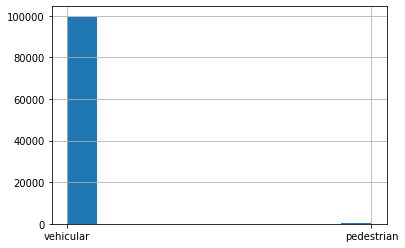

In [37]:
df.type.hist()

In [44]:
def hist_of_bool(pd_series):
    series_as_str = pd_series.apply(lambda x: str(x))
    series_as_str.hist()

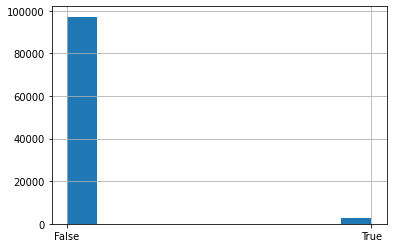

In [45]:
# why tf doesn't this work?
# df.arrest_made.hist()
hist_of_bool(df.arrest_made)

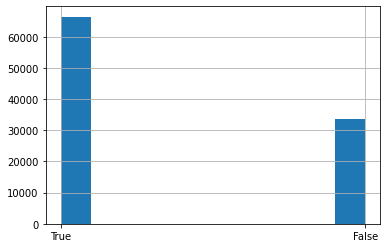

In [47]:
hist_of_bool(df.citation_issued)

<AxesSubplot:>

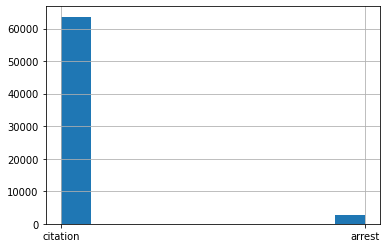

In [49]:
df.outcome.hist()

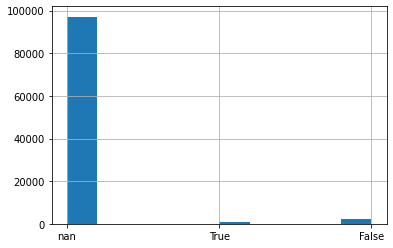

In [50]:
hist_of_bool(df.contraband_found)

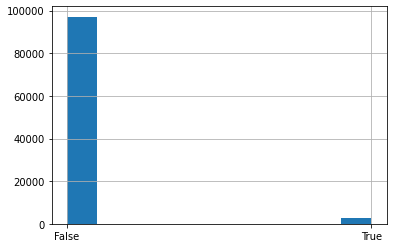

In [51]:
hist_of_bool(df.search_conducted)

Most common:  0    Violation Observed
dtype: object


<AxesSubplot:>

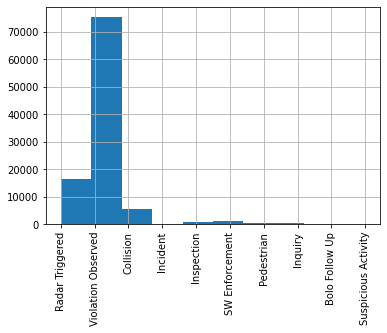

In [58]:
print('Most common: ', df.reason_for_stop.mode())
df.reason_for_stop.hist(xrot=90)

In [79]:
def black_frequency(series):
    return series.value_counts(normalize=True).black

In [60]:
# Are minorities stopped disproportionately?
# SC is 27.3% black.

df.subject_race.value_counts(normalize=True)

# Naively yes, it seems like black people are stopped disproportionately. But it is not that crazy.

white       0.61817
black       0.32777
hispanic    0.04273
other       0.01112
unknown     0.00021
Name: subject_race, dtype: float64

In [61]:
# Are blacks *arrested* disproportionately?

arrests = df[df.arrest_made == True]
arrests.subject_race.value_counts(normalize=True)

# Basically the same as stops.
# Notably there is a big diffierence for hispanics!

white       0.519005
black       0.339964
hispanic    0.134991
other       0.006039
Name: subject_race, dtype: float64

In [62]:
# Time of day and police stops.

df.date.head()

# Huh, as far as I can tell there is no time of day information. Weird.

0    2006-02-12
1    2007-10-17
2    2007-03-20
3    2007-07-02
4    2008-11-08
Name: date, dtype: object

<AxesSubplot:xlabel='year_as_int'>

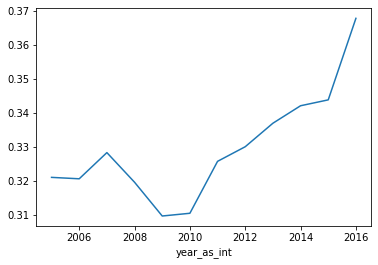

In [81]:
# Yearly proportion of stops where subject is black

year_and_freq = df.groupby('year_as_int').subject_race.apply(black_frequency)
year_and_freq.plot()

<AxesSubplot:xlabel='year_as_int'>

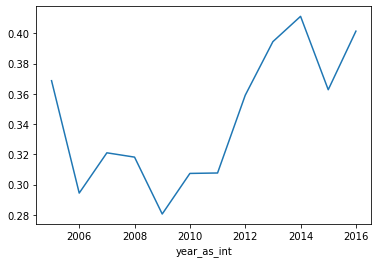

In [82]:
# Yearly proportion of arrests where subject is black

year_and_freq = df[df.arrest_made==True].groupby('year_as_int').subject_race.apply(black_frequency)
year_and_freq.plot()

<ipython-input-121-d2fdef96fb40>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['officer_age_5'] = tdf.officer_age.apply(lambda x: int(x/5) * 5 if x else None)


<AxesSubplot:xlabel='officer_age_5', ylabel='arrest_made'>

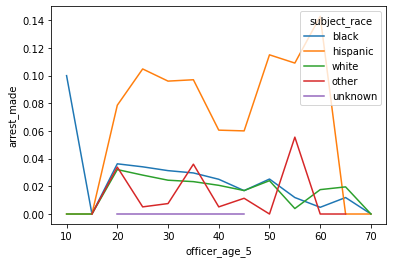

In [121]:
# Arrest rates by officer age by race.

import seaborn as sns

tdf = df[df.officer_age.notna()]

tdf['officer_age_5'] = tdf.officer_age.apply(lambda x: int(x/5) * 5 if x else None)
sos = tdf.groupby(['officer_age_5', 'subject_race'], as_index=False).arrest_made.mean()

sns.lineplot(data=sos, x='officer_age_5', y='arrest_made', hue='subject_race')

In [83]:
# What proportion of stops end up in arrest, by race?
# Hispanics are getting arrested a lot!

df.groupby('subject_race').arrest_made.mean()

subject_race
black       0.029197
hispanic    0.088930
other       0.015288
unknown     0.000000
white       0.023634
Name: arrest_made, dtype: float64

In [105]:
tdf = df[df.officer_age.notna()]

tdf['officer_age_5'] = tdf.officer_age.apply(lambda x: int(x/5) * 5 if x else None)
tdf.groupby(['officer_age_5', 'subject_race']).arrest_made.mean()

<ipython-input-105-54fb1105c8af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['officer_age_5'] = tdf.officer_age.apply(lambda x: int(x/5) * 5 if x else None)


officer_age_5  subject_race
10             black           0.100000
               hispanic        0.000000
               white           0.000000
15             black           0.000000
               hispanic        0.000000
               other           0.000000
               white           0.000000
20             black           0.036272
               hispanic        0.078616
               other           0.033898
               unknown         0.000000
               white           0.032117
25             black           0.034103
               hispanic        0.104839
               other           0.005155
               unknown         0.000000
               white           0.028119
30             black           0.031347
               hispanic        0.096040
               other           0.007547
               unknown         0.000000
               white           0.024431
35             black           0.029680
               hispanic        0.097032
            

<AxesSubplot:>

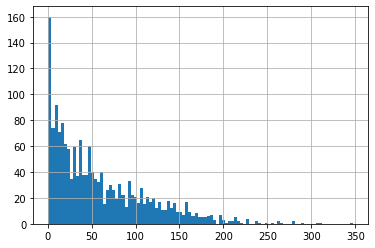

In [131]:
# Distribution of stops by officer.

df.groupby('officer_id_hash', as_index=False).raw_row_number.count().raw_row_number.hist(bins=100)

<AxesSubplot:xlabel='officer_race'>

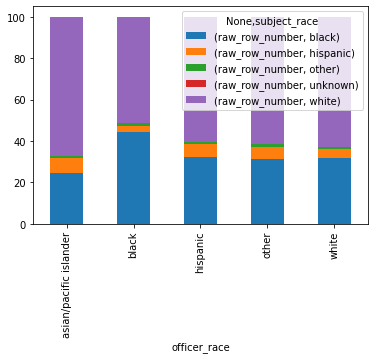

In [148]:
# Stop racial breakdown by officer race.

x = df.groupby(['officer_race', 'subject_race'], as_index=False).raw_row_number.count()

x = x.pivot(index='officer_race', columns='subject_race').fillna(0.0)
x = x.apply(lambda a: a*100/sum(a), axis=1)

x.plot(kind='bar', stacked=True)

# Black people stop the most black people?

<AxesSubplot:xlabel='officer_race', ylabel='pct_of_arrests'>

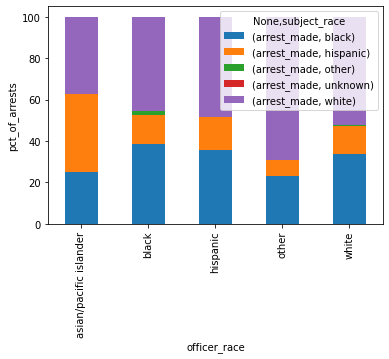

In [154]:
# Arrest racial breakdown by officer race.

x = df.groupby(['officer_race', 'subject_race'], as_index=False).arrest_made.sum()

x = x.pivot(index='officer_race', columns='subject_race').fillna(0.0)
x = x.apply(lambda a: a*100/sum(a), axis=1)

x.plot(kind='bar', stacked=True, ylabel='pct_of_arrests')

# Black people stop the most black people?